In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob
# !pip install mlxtend
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshe

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ----------------------- ---------------- 7.1/12.1 MB 3.3 MB/s eta 0:00:02
   ------------------------ --------------- 7.4/12.1 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 7.5/12.1 MB 3.3 MB/s eta 0:00:02
   -------------------------- ------------- 7.9/12.1 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 8.1/12.1 MB 3.5 MB/s eta 0:00:02
   ---------------------------- ----------- 8.5/12.1 MB 3.6 MB/s eta 0:00:02
   ---------------------------- ----------- 8.7/12.1 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 8.9/12.1 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 9.0/12.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 9.3/12.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------- -------- 9.4/12.1 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 9.7/12.1 MB 3.6 MB/s eta 0:00:01
   --------------------------------- ------ 10.1/12.1 MB 3.7 MB/s eta 0:00:0

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     -- ---------------------------------- 41.0/636.8 kB 991.0 kB/s eta 0:00:01
     --------- ---------------------------- 153.6/636.8 kB 1.8 MB/s eta 0:00:01
     --------------------- ---------------- 358.4/636.8 kB 2.8 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 4.0 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 3.1 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   -------------------------------

  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\yuvak\AppData\Local\Temp\pip-req-build-84f3igkv'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [4]:
df = pd.read_csv('https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/IMDB-Dataset.csv')

In [5]:
df.shape

(50000, 2)

In [6]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df['word_counts'] = df['review'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['review'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['review'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['review'].apply(lambda x: ps.get_stopwords_counts(x))

df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))
df['review'] = df['review'].str.lower()

C:\Users\yuvak\AppData\Roaming\Python\Python311\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [9]:
df['review_without_stopwords'] = df['review'].apply(lambda x: ps.remove_stopwords(x))

In [10]:
df.head()

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts,review_without_stopwords
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,135,reviewers mentioned watching 1 oz episode you'...
1,a wonderful little production. the filming tec...,positive,162,837,5.166667,71,wonderful little production. filming technique...
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,138,611,4.427536,63,basically there's family little boy (jake) thi...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,107,"petter mattei's ""love time money"" visually stu..."


In [11]:
df.columns

Index(['review', 'sentiment', 'word_counts', 'char_counts', 'avg_wordlength',
       'stopwords_counts', 'review_without_stopwords'],
      dtype='object')

In [12]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

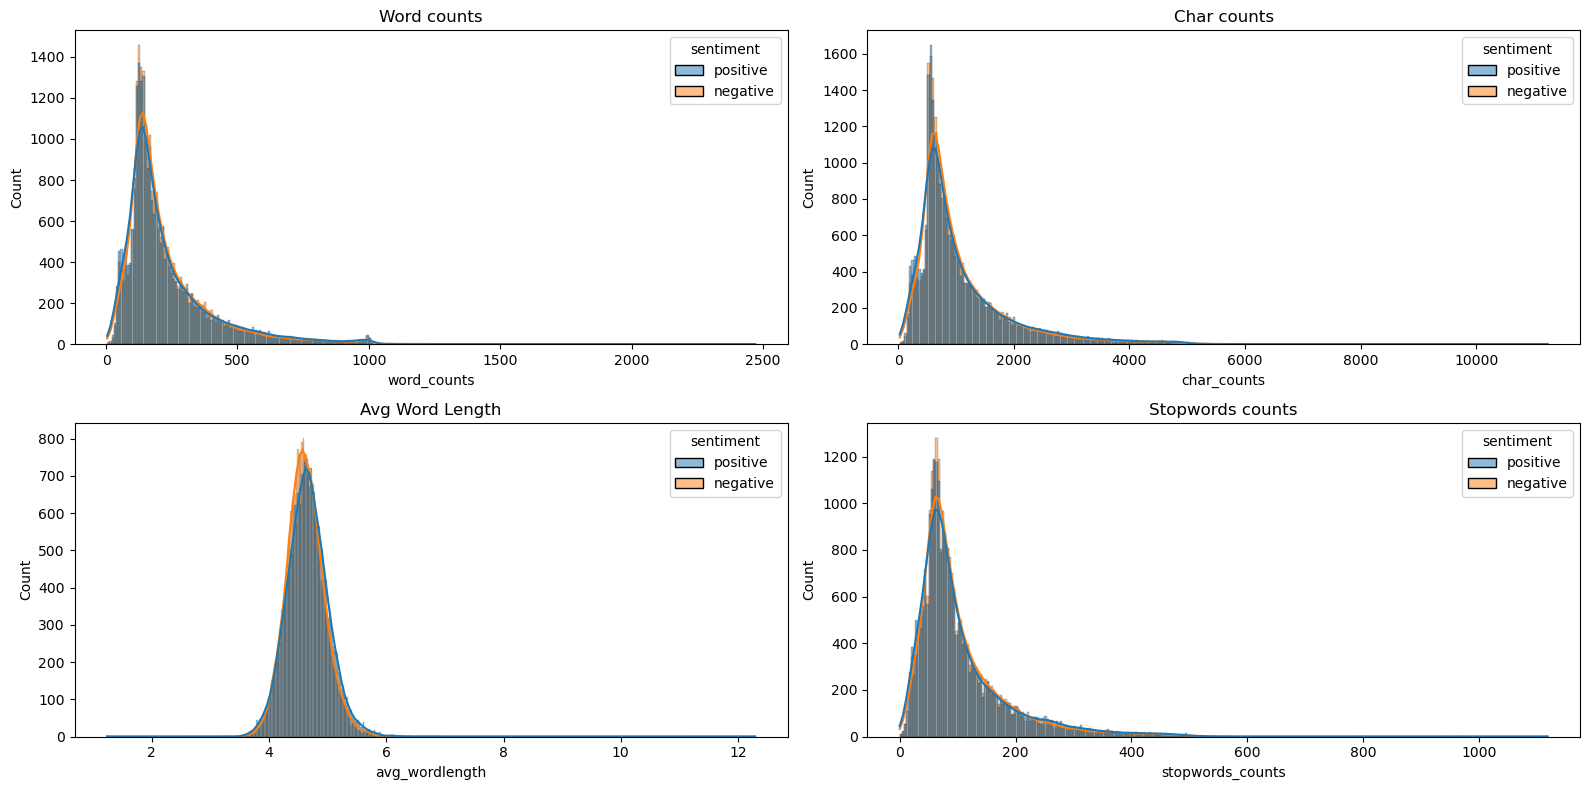

In [13]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], 
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['sentiment']
                                                   )

In [16]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [17]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [18]:
clf.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [19]:
y_pred = clf.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

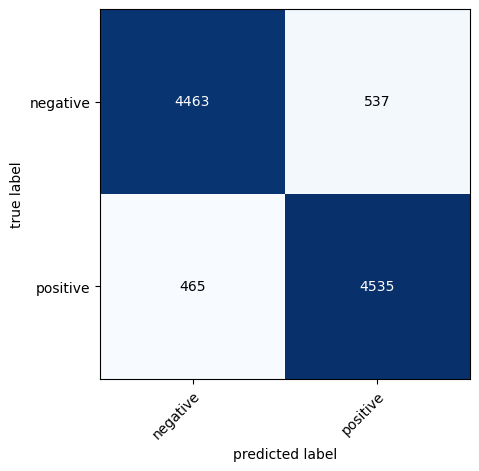

In [21]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [22]:
clf.predict(['Wow, this is amazing lesson'])

array(['positive'], dtype=object)

In [23]:
clf.predict(['Wow, this sucks'])

array(['negative'], dtype=object)

In [24]:
clf.predict(['please like this video. it helps me a lot'])

array(['positive'], dtype=object)

In [25]:
import pickle

pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))